In [ ]:
!wget https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2019.csv

--2022-07-26 01:07:50--  https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2019.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88842717 (85M) [text/plain]
Saving to: ‘dadosLimpos2019.csv’

dadosLimpos2019.csv 100%[===================>]  84.73M   279MB/s    in 0.3s    

2022-07-26 01:07:52 (279 MB/s) - ‘dadosLimpos2019.csv’ saved [88842717/88842717]



In [ ]:
!wget https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2020.csv

--2022-07-26 01:07:52--  https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2020.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68691298 (66M) [text/plain]
Saving to: ‘dadosLimpos2020.csv’

dadosLimpos2020.csv 100%[===================>]  65.51M   201MB/s    in 0.3s    

2022-07-26 01:07:54 (201 MB/s) - ‘dadosLimpos2020.csv’ saved [68691298/68691298]



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import seaborn as sns

In [2]:
fies2019 = pd.read_csv('./dadosLimpos2019.csv', encoding="UTF-8")

fies2020 = pd.read_csv('./dadosLimpos2020.csv', encoding="UTF-8")

In [ ]:
fies2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID do estudante                 232432 non-null  int64  
 1   Sexo                            232432 non-null  object 
 2   Data de Nascimento              232432 non-null  object 
 3   UF de residência                232432 non-null  object 
 4   Etnia/Cor                       232432 non-null  object 
 5   Pessoa com deficiência?         232432 non-null  object 
 6   Ano conclusão ensino médio      232432 non-null  int64  
 7   Concluiu curso superior?        232432 non-null  object 
 8   Nº de membros Grupo Familiar    232432 non-null  int64  
 9   Renda familiar mensal bruta     232432 non-null  float64
 10  Renda mensal bruta per capita   232432 non-null  float64
 11  UF                              232432 non-null  object 
 12  Área do conhecim

# Exploração dos dados

## Respondendo às perguntas propostas:

### 1 - Faixa de renda per capita predominante no requerimento do FIES

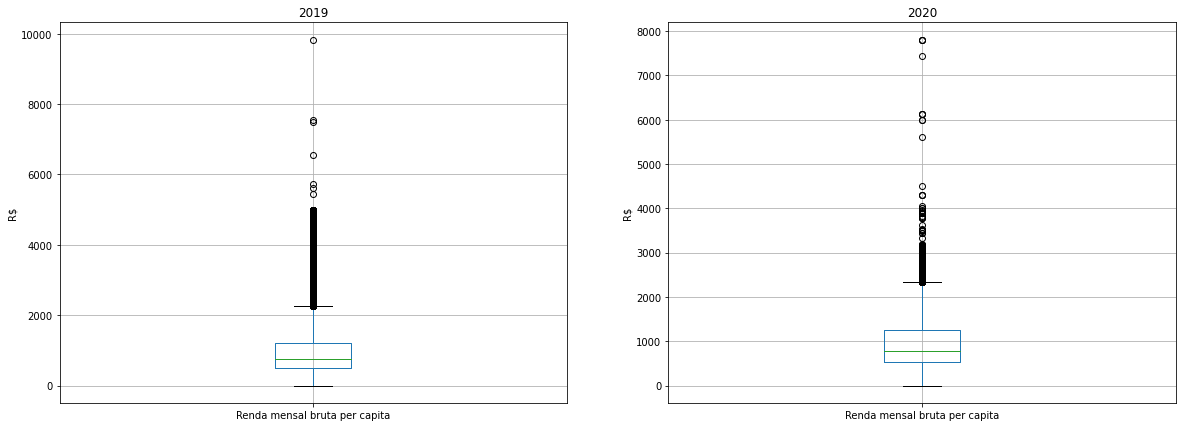

In [ ]:
# Ajusta o tamanho do gráfico a ser plotado
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
fies2019.boxplot(column=['Renda mensal bruta per capita'])
plt.title('2019')
plt.ylabel('R$')

plt.subplot(1, 2, 2)
fies2020.boxplot(column=['Renda mensal bruta per capita'])
plt.title('2020')
plt.ylabel('R$')

plt.show()

Após a análise do boxplot pode-se verificar que a renda concentra-se entre quem não tem nenhuma renda, até o valor de 2000 reais. Tendo um número considerável de outliers com valores maiores que 2000 reais. Dessa forma, a renda predominante das pessoas que requerem financiamento do FIES está predominantemente abaixo dos 2000 reais.

## 2 - Como é a dispersão entre os dados da quantidade de inscrições para os estados das IES com mais e menos inscritos?

In [ ]:
fies2019_estado = fies2019['UF do Local de Oferta'].value_counts()
maior_Inscricao = fies2019_estado.max()
estado = fies2019_estado[ fies2019_estado ==  maior_Inscricao].index[0]
print(f"O Estado {estado} foi o que teve um maior número de incrições, totalizando {maior_Inscricao}\n")

menor_Inscricao = fies2019_estado.min()
estado = fies2019_estado[ fies2019_estado ==  menor_Inscricao].index[0]
print(f"O Estado {estado} foi o que teve um menor número de incrições, totalizando {menor_Inscricao}\n")

O Estado SP foi o que teve um maior número de incrições, totalizando 32896

O Estado RR foi o que teve um menor número de incrições, totalizando 374



In [ ]:
fies2020_estado = fies2020['UF do Local de Oferta'].value_counts()
maior_Inscricao = fies2020_estado.max()
estado = fies2020_estado[ fies2020_estado ==  maior_Inscricao].index[0]
print(f"O Estado {estado} foi o que teve um maior número de incrições, totalizando {maior_Inscricao}\n")

menor_Inscricao = fies2020_estado.min()
estado = fies2020_estado[ fies2020_estado ==  menor_Inscricao].index[0]
print(f"O Estado {estado} foi o que teve um menor número de incrições, totalizando {menor_Inscricao}\n")

O Estado SP foi o que teve um maior número de incrições, totalizando 24534

O Estado RR foi o que teve um menor número de incrições, totalizando 342



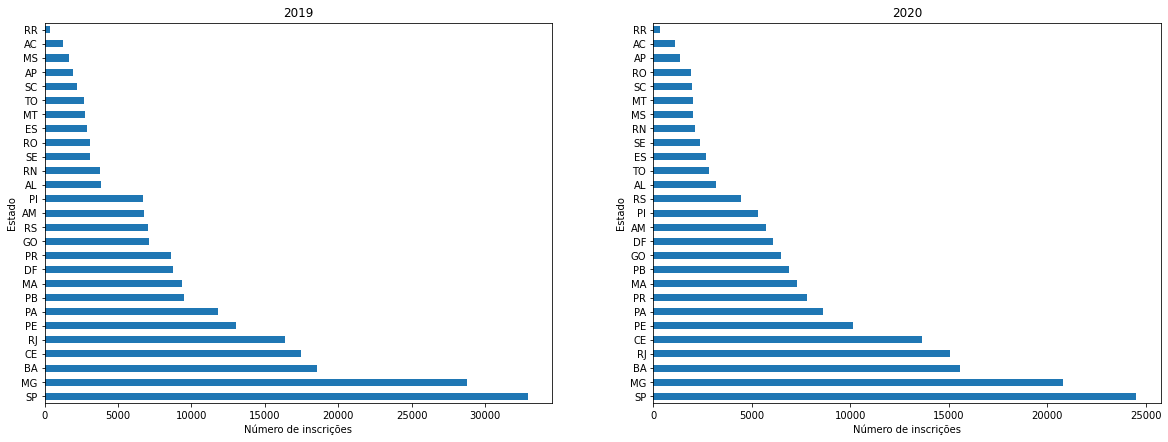

In [ ]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
fies2019_estado.plot.barh()
plt.title('2019')
plt.xlabel('Número de inscrições')
plt.ylabel('Estado')

plt.subplot(1, 2, 2)
fies2020_estado.plot.barh()
plt.title('2020')
plt.xlabel('Número de inscrições')
plt.ylabel('Estado')

plt.show()

O estado de São Paulo, com 32897 inscrições foi o estado com maior número de inscrições do País,  em contrapartida, Roraima foi o estado com menos inscrições, sendo 374 inscrições para todo o estado. Verifica-se uma alta dispersão entre os números de inscrição por estado, tendo as inscrições concentradas nos estados : SP, MG, BA, RJ e CE.

##  3 - Existe uma faixa predominante de espera entre a conclusão do ensino médio e a inscrição na faculdade por meio do FIES?

In [ ]:
from datetime import date, timedelta

 
fies2019['Anos para inscrição após EM'] = fies2019['Ano conclusão ensino médio'].apply(lambda x : 2019 -  x)  
fies2020['Anos para inscrição após EM'] = fies2020['Ano conclusão ensino médio'].apply(lambda x : 2020 -  x) 

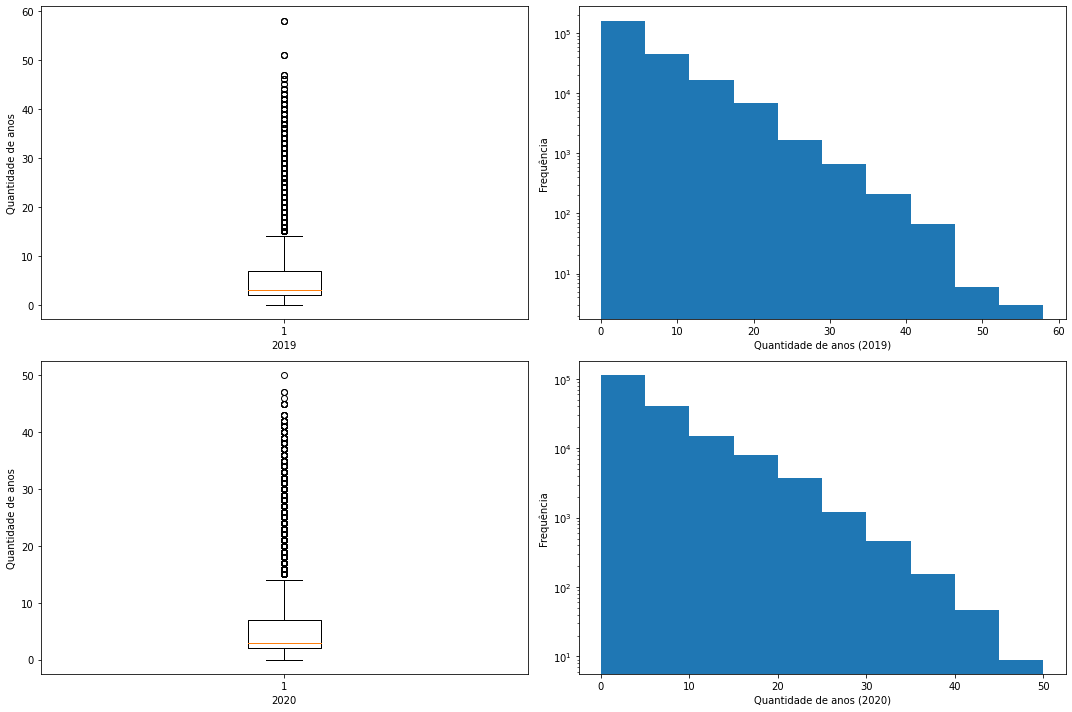

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

keys2019 = list(fies2019['Anos para inscrição após EM'].keys())
values2019 = list(fies2019['Anos para inscrição após EM'])




ax[0][0].boxplot(values2019)
ax[0][0].set(xlabel='2019', ylabel='Quantidade de anos')


ax[0][1].hist(values2019, bins=10)
ax[0][1].set(xlabel='Quantidade de anos (2019)', ylabel='Frequência')
ax[0][1].set_yscale('log')
fig.tight_layout()

keys2020 = list(fies2020['Anos para inscrição após EM'].keys())
values2020 = list(fies2020['Anos para inscrição após EM'])


ax[1][0].boxplot(values2020)
ax[1][0].set(xlabel='2020', ylabel='Quantidade de anos')


ax[1][1].hist(values2020, bins=10)
ax[1][1].set(xlabel='Quantidade de anos (2020)', ylabel='Frequência')
ax[1][1].set_yscale('log')
fig.tight_layout()

plt.show()

Observando os dados através de  boxplot e pelo histograma para a dispersão da faixa de espera entre a conclusão do ensino médio e a inscrição na faculdade por meio do FIES, pode-se verificar que a faixa predominante encontra-se entre 0 e 10 anos de espera.

## 4 - As pessoas com deficiência estão menos inseridas nos aceitos do FIES?

In [ ]:
fies2019_pessoa_sem_deficiencia =  fies2019[fies2019['Pessoa com deficiência?'] == 'NÃO'] 
fies2019_pessoa_com_deficiencia =  fies2019[fies2019['Pessoa com deficiência?'] == 'SIM'] 

pessoas_contradatas_sem_def = fies2019_pessoa_sem_deficiencia[fies2019_pessoa_sem_deficiencia['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas sem deficiência contratadas: ", pessoas_contradatas_sem_def['ID do estudante'].size )

pessoas_contradatas_com_def = fies2019_pessoa_com_deficiencia[fies2019_pessoa_com_deficiencia['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas com deficiência contratadas: ", pessoas_contradatas_com_def['ID do estudante'].size )

porcentagem_aprovada_sem = pessoas_contradatas_sem_def['ID do estudante'].size  * 100 /   fies2019_pessoa_sem_deficiencia['ID do estudante'].size 
porcentagem_aprovada_com = pessoas_contradatas_com_def['ID do estudante'].size  * 100 /   fies2019_pessoa_com_deficiencia['ID do estudante'].size 

print(f"A porcentagem de pessoas sem deficiência contratadas foi {porcentagem_aprovada_sem:.2f}%")
print(f"A porcentagem de pessoas com deficiência contratadas foi {porcentagem_aprovada_com:.2f}%")

Número de pessoas sem deficiência contratadas:  25315
Número de pessoas com deficiência contratadas:  139
A porcentagem de pessoas sem deficiência contratadas foi 10.98%
A porcentagem de pessoas com deficiência contratadas foi 7.62%


In [ ]:
fies2020_pessoa_sem_deficiencia =  fies2020[fies2020['Pessoa com deficiência?'] == 'NÃO'] 
fies2020_pessoa_com_deficiencia =  fies2020[fies2020['Pessoa com deficiência?'] == 'SIM'] 

pessoas_contradatas_sem_def = fies2020_pessoa_sem_deficiencia[fies2020_pessoa_sem_deficiencia['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas sem deficiência contratadas: ", pessoas_contradatas_sem_def['ID do estudante'].size )

pessoas_contradatas_com_def = fies2020_pessoa_com_deficiencia[fies2020_pessoa_com_deficiencia['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas com deficiência contratadas: ", pessoas_contradatas_com_def['ID do estudante'].size )

porcentagem_aprovada_sem = pessoas_contradatas_sem_def['ID do estudante'].size  * 100 /   fies2020_pessoa_sem_deficiencia['ID do estudante'].size 
porcentagem_aprovada_com = pessoas_contradatas_com_def['ID do estudante'].size  * 100 /   fies2020_pessoa_com_deficiencia['ID do estudante'].size 

print(f"A porcentagem de pessoas sem deficiência contratadas foi {porcentagem_aprovada_sem:.2f}%")
print(f"A porcentagem de pessoas com deficiência contratadas foi {porcentagem_aprovada_com:.2f}%")

Número de pessoas sem deficiência contratadas:  13338
Número de pessoas com deficiência contratadas:  77
A porcentagem de pessoas sem deficiência contratadas foi 7.37%
A porcentagem de pessoas com deficiência contratadas foi 5.01%


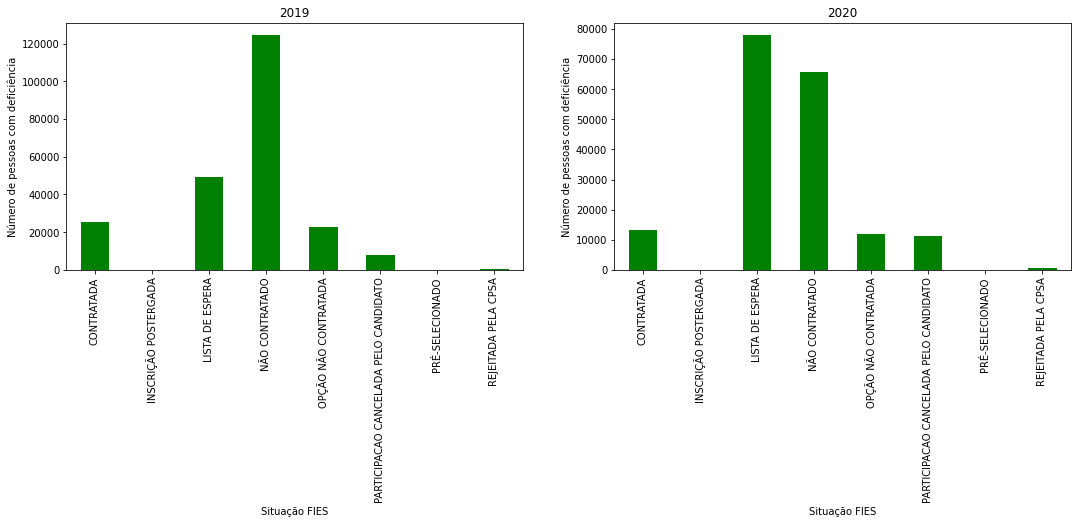

In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
fies2019_pessoa_sem_deficiencia.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='g')
plt.title('2019')
plt.xlabel('Situação FIES')
plt.ylabel('Número de pessoas sem deficiência')

plt.subplot(2, 2, 2)
fies2020_pessoa_sem_deficiencia.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='g')
plt.title('2020')
plt.xlabel('Situação FIES')
plt.ylabel('Número de pessoas sem deficiência')


plt.show()

Text(0, 0.5, 'Número de pessoas com deficiência')

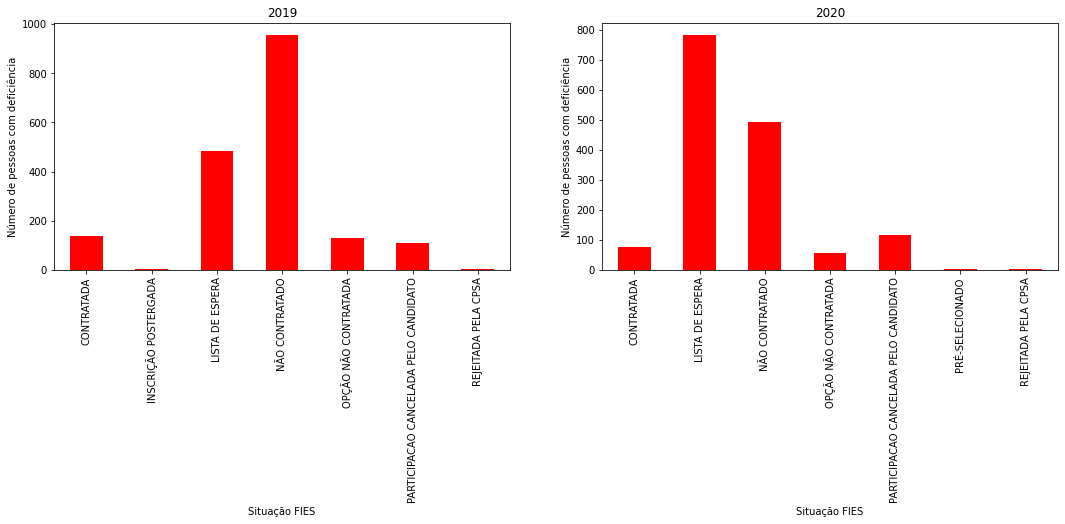

In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
fies2019_pessoa_com_deficiencia.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='r')
plt.title('2019')
plt.xlabel('Situação FIES')
plt.ylabel('Número de pessoas com deficiência')

plt.subplot(2, 2, 2)
fies2020_pessoa_com_deficiencia.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='r')
plt.title('2020')
plt.xlabel('Situação FIES')
plt.ylabel('Número de pessoas com deficiência')

Plotando um gráfico para pessoas com deficiência e para pessoas sem deficiência é possível ver que os dados se assemelham, tendo um baixo nível de aprovação nos dois casos. Sendo 10,98% de aprovação para pessoas sem deficiência, e uma porcentagem de 7,62% para pessoas com deficiência. Pessoas sem deficiência têm uma porcentagem maior de aprovação, mas não é uma diferença discrepante. É interessante notar que, se comparado com os dados de pessoa sem deficiência, as pessoas com deficiência são menos aceitas, mas ao colocar no contexto que leva em consideração que as pessoas com deficiência estão em menor número, percebe-se que não há uma grande diferença no número de aceitos das duas categorias.

### 5 - As pessoas pretas e pardas estão menos inseridas nos aceitos do FIES,  em comparação com pessoas brancas?

In [ ]:
fies2019_pessoas_pretas =  fies2019[fies2019['Etnia/Cor'] == 'PRETA'] 
fies2019_pessoas_pardas =  fies2019[fies2019['Etnia/Cor'] == 'PARDA']
fies2019_pessoas_brancas =  fies2019[fies2019['Etnia/Cor'] == 'BRANCA']

pessoas_contratadas_pretas = fies2019_pessoas_pretas[fies2019_pessoas_pretas['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas pretas contratadas em 2019: ", pessoas_contratadas_pretas['ID do estudante'].size )

pessoas_contratadas_pardas = fies2019_pessoas_pardas[fies2019_pessoas_pardas['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas pardas contratadas em 2019: ", pessoas_contratadas_pardas['ID do estudante'].size )

pessoas_contratadas_brancas = fies2019_pessoas_brancas[fies2019_pessoas_brancas['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas brancas contratadas em 2019: ", pessoas_contratadas_brancas['ID do estudante'].size )

porcentagem_aprovada_pretas = pessoas_contratadas_pretas['ID do estudante'].size  * 100 /   fies2019_pessoas_pretas['ID do estudante'].size 
porcentagem_aprovada_pardas = pessoas_contratadas_pardas['ID do estudante'].size  * 100 /   fies2019_pessoas_pardas['ID do estudante'].size
porcentagem_aprovada_brancas = pessoas_contratadas_brancas['ID do estudante'].size  * 100 /   fies2019_pessoas_brancas['ID do estudante'].size 

print(f"A porcentagem de pessoas pretas contratadas em 2019 foi {porcentagem_aprovada_pretas:.2f}%")
print(f"A porcentagem de pessoas pardas contratadas em 2019 foi {porcentagem_aprovada_pardas:.2f}%")
print(f"A porcentagem de pessoas brancas contratadas em 2019 foi {porcentagem_aprovada_brancas:.2f}%")

Número de pessoas pretas contratadas em 2019:  2918
Número de pessoas pardas contratadas em 2019:  13168
Número de pessoas brancas contratadas em 2019:  8767
A porcentagem de pessoas pretas contratadas em 2019 foi 10.24%
A porcentagem de pessoas pardas contratadas em 2019 foi 11.38%
A porcentagem de pessoas brancas contratadas em 2019 foi 10.67%


In [ ]:
fies2020_pessoas_pretas =  fies2020[fies2020['Etnia/Cor'] == 'PRETA'] 
fies2020_pessoas_pardas =  fies2020[fies2020['Etnia/Cor'] == 'PARDA']
fies2020_pessoas_brancas =  fies2020[fies2020['Etnia/Cor'] == 'BRANCA']

pessoas_contratadas_pretas = fies2020_pessoas_pretas[fies2020_pessoas_pretas['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas pretas contratadas em 2020: ", pessoas_contratadas_pretas['ID do estudante'].size )

pessoas_contratadas_pardas = fies2020_pessoas_pardas[fies2020_pessoas_pardas['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas pardas contratadas em 2020: ", pessoas_contratadas_pardas['ID do estudante'].size )

pessoas_contratadas_brancas = fies2020_pessoas_brancas[fies2020_pessoas_brancas['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas brancas contratadas em 2020: ", pessoas_contratadas_brancas['ID do estudante'].size )

porcentagem_aprovada_pretas = pessoas_contratadas_pretas['ID do estudante'].size  * 100 /   fies2020_pessoas_pretas['ID do estudante'].size 
porcentagem_aprovada_pardas = pessoas_contratadas_pardas['ID do estudante'].size  * 100 /   fies2020_pessoas_pardas['ID do estudante'].size
porcentagem_aprovada_brancas = pessoas_contratadas_brancas['ID do estudante'].size  * 100 /   fies2020_pessoas_brancas['ID do estudante'].size 

print(f"A porcentagem de pessoas pretas contratadas em 2020 foi {porcentagem_aprovada_pretas:.2f}%")
print(f"A porcentagem de pessoas pardas contratadas em 2020 foi {porcentagem_aprovada_pardas:.2f}%")
print(f"A porcentagem de pessoas brancas contratadas em 2020 foi {porcentagem_aprovada_brancas:.2f}%")

Número de pessoas pretas contratadas em 2020:  1451
Número de pessoas pardas contratadas em 2020:  6331
Número de pessoas brancas contratadas em 2020:  5292
A porcentagem de pessoas pretas contratadas em 2020 foi 6.42%
A porcentagem de pessoas pardas contratadas em 2020 foi 7.34%
A porcentagem de pessoas brancas contratadas em 2020 foi 7.70%


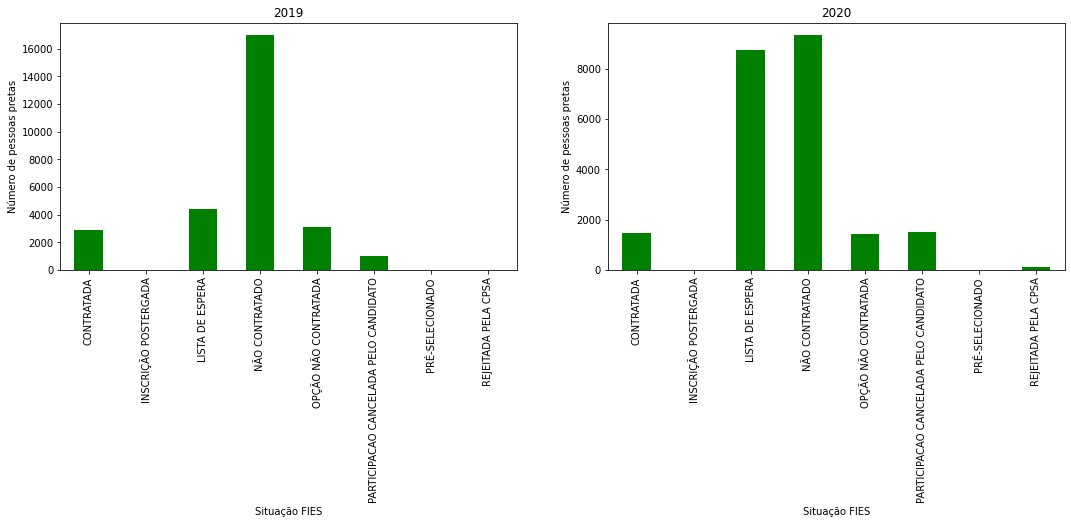

In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
fies2019_pessoas_pretas.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='g')
plt.title('2019')
plt.xlabel('Situação FIES')
plt.ylabel('Número de pessoas pretas')

plt.subplot(2, 2, 2)
fies2020_pessoas_pretas.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='g')
plt.title('2020')
plt.xlabel('Situação FIES')
plt.ylabel('Número de pessoas pretas')


plt.show()

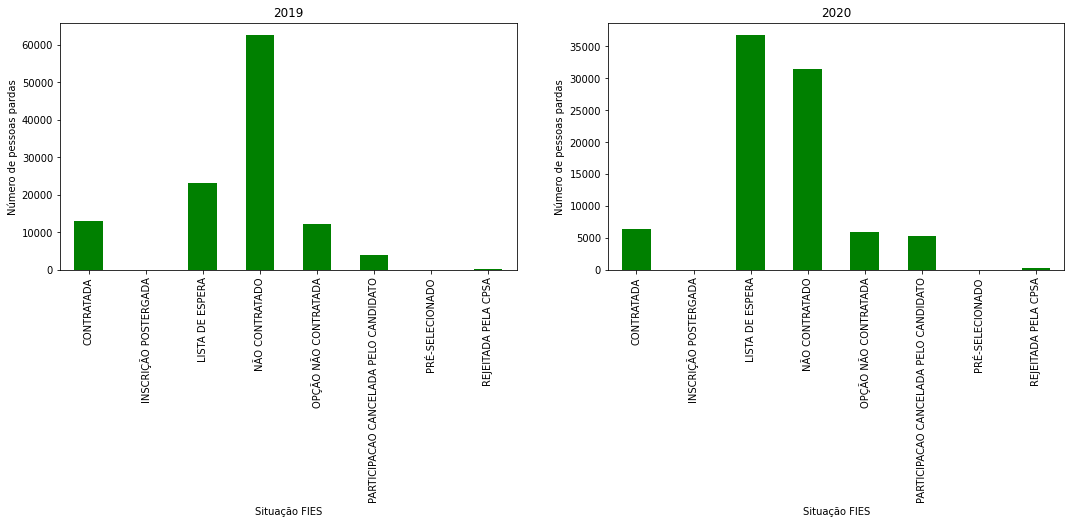

In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
fies2019_pessoas_pardas.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='g')
plt.title('2019')
plt.xlabel('Situação FIES')
plt.ylabel('Número de pessoas pardas')

plt.subplot(2, 2, 2)
fies2020_pessoas_pardas.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='g')
plt.title('2020')
plt.xlabel('Situação FIES')
plt.ylabel('Número de pessoas pardas')


plt.show()

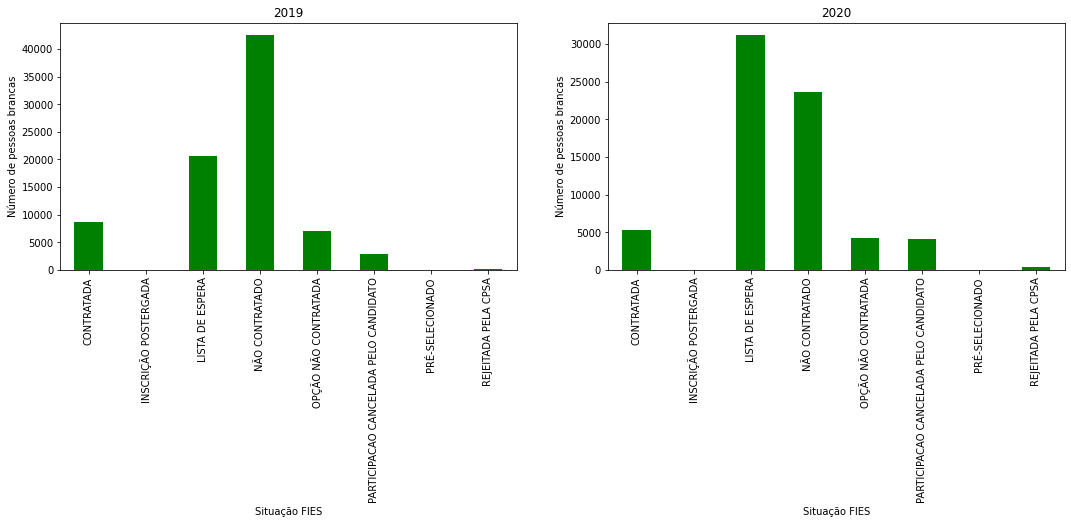

In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
fies2019_pessoas_brancas.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='g')
plt.title('2019')
plt.xlabel('Situação FIES')
plt.ylabel('Número de pessoas brancas')

plt.subplot(2, 2, 2)
fies2020_pessoas_brancas.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='g')
plt.title('2020')
plt.xlabel('Situação FIES')
plt.ylabel('Número de pessoas brancas')


plt.show()

Nesta análise, não encontrou-se uma diferença impactante nos dados de pessoas pretas e pardas se comparado com pessoas brancas, sendo que a porcentagem de aprovados em relação a outros da mesma etnia/cor não houve grandes diferenças. Dessa forma, não podemos assumir que as pessoas pretas/pardas estão menos inseridas que as brancas.

### 6 - É possível estabelecer uma relação entre sexo e média de notas do enem?

In [ ]:
fies2019_sexo_cat = pd.get_dummies(fies2019, columns=["Sexo"])
fies2019_sexo_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID do estudante                 232432 non-null  int64  
 1   Data de Nascimento              232432 non-null  object 
 2   UF de residência                232432 non-null  object 
 3   Etnia/Cor                       232432 non-null  object 
 4   Pessoa com deficiência?         232432 non-null  object 
 5   Ano conclusão ensino médio      232432 non-null  int64  
 6   Concluiu curso superior?        232432 non-null  object 
 7   Nº de membros Grupo Familiar    232432 non-null  int64  
 8   Renda familiar mensal bruta     232432 non-null  float64
 9   Renda mensal bruta per capita   232432 non-null  float64
 10  UF                              232432 non-null  object 
 11  Área do conhecimento            232432 non-null  object 
 12  Subárea do conhe

In [ ]:
fies2020_sexo_cat = pd.get_dummies(fies2020, columns=["Sexo"])
fies2020_sexo_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID do estudante                 182425 non-null  int64  
 1   Data de Nascimento              182425 non-null  object 
 2   UF de residência                182425 non-null  object 
 3   Etnia/Cor                       182425 non-null  object 
 4   Pessoa com deficiência?         182425 non-null  object 
 5   Ano conclusão ensino médio      182425 non-null  int64  
 6   Concluiu curso superior?        182425 non-null  object 
 7   Nº de membros Grupo Familiar    182425 non-null  int64  
 8   Renda familiar mensal bruta     182425 non-null  float64
 9   Renda mensal bruta per capita   182425 non-null  float64
 10  UF                              182425 non-null  object 
 11  Área do conhecimento            182425 non-null  object 
 12  Subárea do conhe

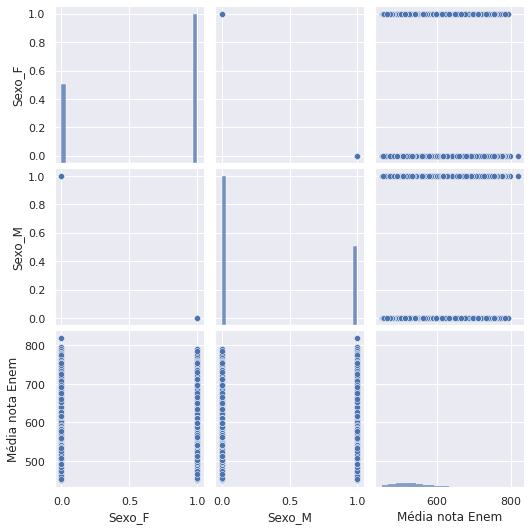

In [ ]:

sns.pairplot(fies2019_sexo_cat[['Sexo_F', 'Sexo_M', 'Média nota Enem']])

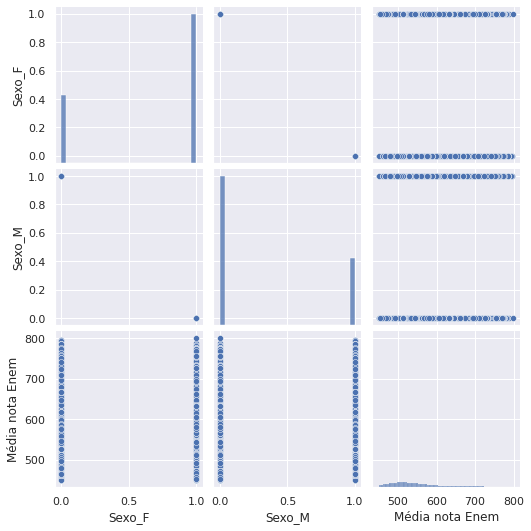

In [ ]:
sns.pairplot(fies2020_sexo_cat[['Sexo_F', 'Sexo_M', 'Média nota Enem']])

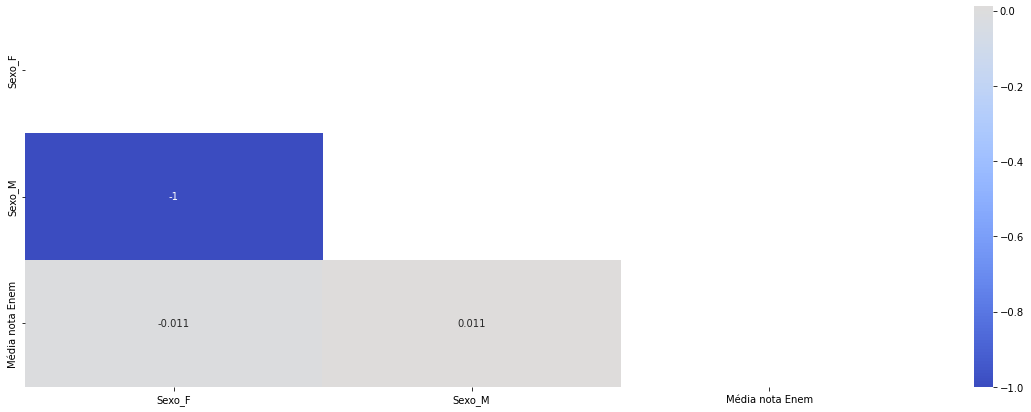

In [ ]:
Var_Corr = fies2019_sexo_cat[['Sexo_F', 'Sexo_M', 'Média nota Enem']].corr()
matrix = np.triu(fies2019_sexo_cat[['Sexo_F', 'Sexo_M', 'Média nota Enem']].corr())

plt.figure(figsize = (20,7))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns,\
            annot=True,center= 0, cmap= 'coolwarm',mask=matrix)

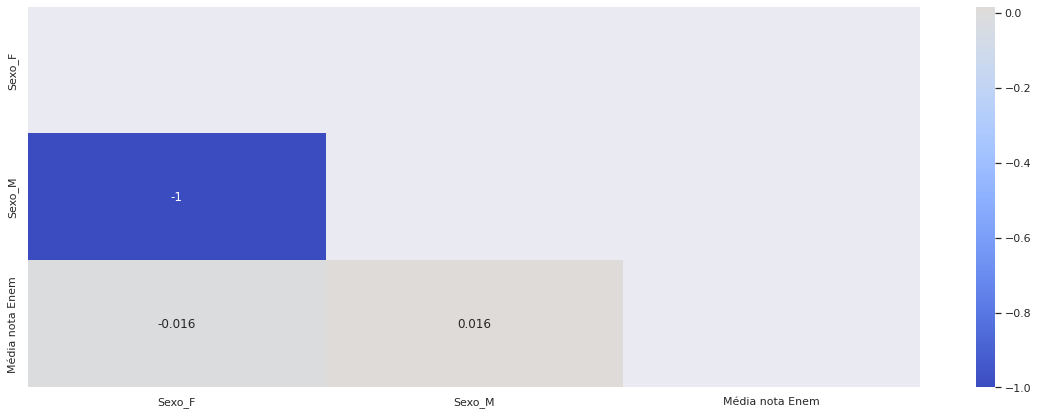

In [ ]:
Var_Corr = fies2020_sexo_cat[['Sexo_F', 'Sexo_M', 'Média nota Enem']].corr()
matrix = np.triu(fies2020_sexo_cat[['Sexo_F', 'Sexo_M', 'Média nota Enem']].corr())

plt.figure(figsize = (20,7))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns,\
            annot=True,center= 0, cmap= 'coolwarm',mask=matrix)

In [ ]:
from sklearn.linear_model import LinearRegression

def regressao_linear(X,Y,cols):

  if len(cols) == 1:
    X = X.values.reshape(-1,1)

  lm = LinearRegression()
  lm.fit(X,Y)
  print('Coeficiente estimado: ', lm.coef_)    
  print('R2 (score): ', lm.score(X,Y))
  print("Intercept %.3f " % lm.intercept_)

  coeff_df = pd.DataFrame(lm.coef_, cols, columns=['Coefficient'])
  print(coeff_df)

Y = fies2019_sexo_cat['Média nota Enem']
X = fies2019_sexo_cat['Sexo_M']
print("Valores de regressão linear para o sexo masculino:\n")
regressao_linear(X,Y,['Sexo_M'])

X = fies2019_sexo_cat['Sexo_F']
print("Valores de regressão linear para o sexo feminino:\n")
regressao_linear(X,Y,['Sexo_F'])


Valores de regressão linear para o sexo masculino:

Coeficiente estimado:  [1.63978303]
R2 (score):  0.0001290397713576974
Intercept 546.984 
        Coefficient
Sexo_M     1.639783
Valores de regressão linear para o sexo feminino:

Coeficiente estimado:  [-1.63978303]
R2 (score):  0.0001290397713576974
Intercept 548.624 
        Coefficient
Sexo_F    -1.639783


In [ ]:
from sklearn.linear_model import LinearRegression

def regressao_linear(X,Y,cols):

  if len(cols) == 1:
    X = X.values.reshape(-1,1)

  lm = LinearRegression()
  lm.fit(X,Y)
  print('Coeficiente estimado: ', lm.coef_)    
  print('R2 (score): ', lm.score(X,Y))
  print("Intercept %.3f " % lm.intercept_)

  coeff_df = pd.DataFrame(lm.coef_, cols, columns=['Coefficient'])
  print(coeff_df)

Y = fies2020_sexo_cat['Média nota Enem']
X = fies2020_sexo_cat['Sexo_M']
print("Valores de regressão linear para o sexo masculino:\n")
regressao_linear(X,Y,['Sexo_M'])

X = fies2020_sexo_cat['Sexo_F']
print("Valores de regressão linear para o sexo feminino:\n")
regressao_linear(X,Y,['Sexo_F'])

Valores de regressão linear para o sexo masculino:

Coeficiente estimado:  [2.57928278]
R2 (score):  0.0002659262225960246
Intercept 554.055 
        Coefficient
Sexo_M     2.579283
Valores de regressão linear para o sexo feminino:

Coeficiente estimado:  [-2.57928278]
R2 (score):  0.0002659262225960246
Intercept 556.634 
        Coefficient
Sexo_F    -2.579283


Através dos dados acima foi possível estabelecer que a correlação do sexo, tanto masculino, quanto feminino é muito pequena. Este resultado está claro pelo baixo coeficiente de Pearson e os resultados não satisfatórios quando aplicada a regressão linear. A partir disso, podemos concluir que não existe relação entre sexo e média de nota do ENEM. No entanto, também nota-se que há uma correlação negativa com o sexo feminino e uma correlação positiva com o sexo masculino.

### 8 - Quem concluiu o curso superior possui uma renda per capita maior?

In [8]:
fies2019_com_curso_sup = fies2019[fies2019['Concluiu curso superior?'] == 'SIM']
fies2019_sem_curso_sup = fies2019[fies2019['Concluiu curso superior?'] == 'NÃO']

fies2020_com_curso_sup = fies2020[fies2020['Concluiu curso superior?'] == 'SIM']
fies2020_sem_curso_sup = fies2020[fies2020['Concluiu curso superior?'] == 'NÃO']

[Text(0, 0.5, 'Renda per capita sem curso superior'), Text(0.5, 0, '2020')]

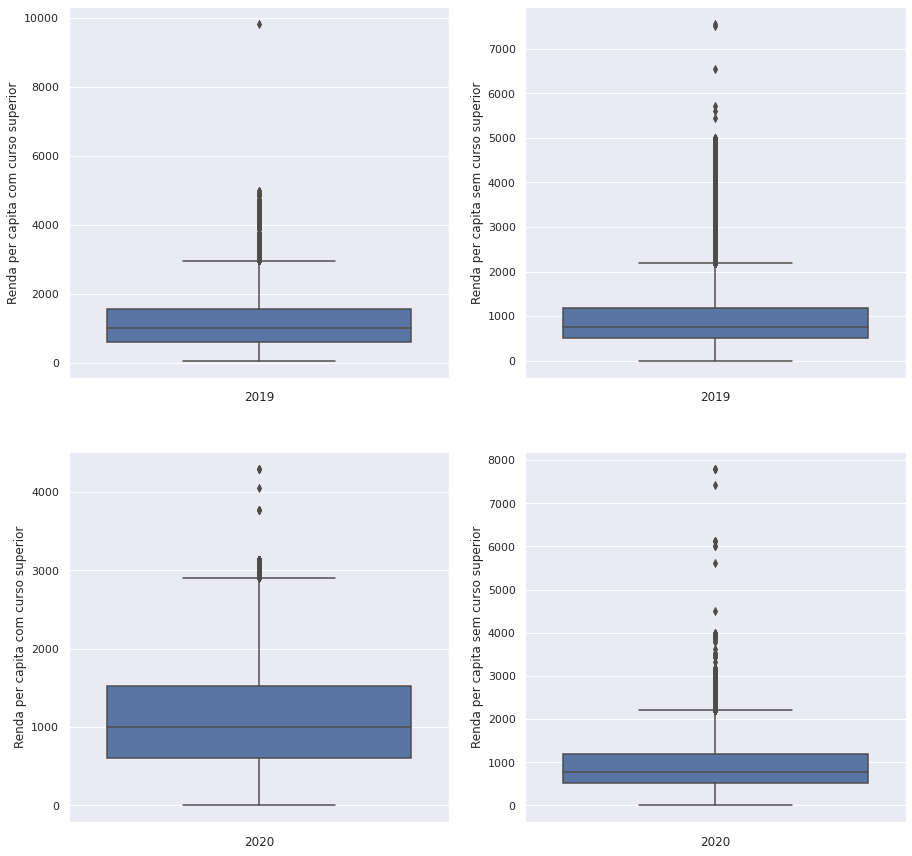

In [30]:

sns.set(rc={'figure.figsize':(15,15)})

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(data=fies2019_com_curso_sup, y='Renda mensal bruta per capita', ax=axes[0,0])
axes[0][0].set(xlabel='2019', ylabel='Renda per capita com curso superior')
sns.boxplot(data=fies2019_sem_curso_sup, y='Renda mensal bruta per capita', ax=axes[0,1])
axes[0][1].set(xlabel='2019', ylabel='Renda per capita sem curso superior')
sns.boxplot(data=fies2020_com_curso_sup, y='Renda mensal bruta per capita', ax=axes[1,0])
axes[1][0].set(xlabel='2020', ylabel='Renda per capita com curso superior')
sns.boxplot(data=fies2020_sem_curso_sup, y='Renda mensal bruta per capita', ax=axes[1,1])
axes[1][1].set(xlabel='2020', ylabel='Renda per capita sem curso superior')

Estes resultados demonstram uma diferença entre dados de 2019 e 2020, já que em 2019 as pessoas com curso superior tinham uma renda per capita similar às pessoas sem. Porém, em 2020, nota-se uma diferença entre as pessoas com curso superior e as pessoas sem, onde as pessoas com curso superior tem uma renda superior.

# Estatística descritiva

## Há uma faixa renda per capita predominante no requerimento do FIES?


### 2019

In [ ]:
mean_renda_pc = fies2019['Renda mensal bruta per capita'].mean()
print('Média da renda: {}'.format(mean_renda_pc))
dp_renda_pc = fies2019['Renda mensal bruta per capita'].std()
print('Desvio padrão da renda: {}'.format(dp_renda_pc))
median_renda_pc = fies2019['Renda mensal bruta per capita'].median()
print('Mediana da renda: {}'.format(median_renda_pc))
max_renda_pc = fies2019['Renda mensal bruta per capita'].max()
print('Valor máximo da renda: {}'.format(max_renda_pc))

# Percentil 25 (1º quartil)
print('Percentil 25: {:.2f}'.format(fies2019['Renda mensal bruta per capita'].quantile(.25)))

# Percentil 50 (2º quartil ou mediana)
print('Percentil 50: {:.2f}'.format(fies2019['Renda mensal bruta per capita'].quantile(.50)))

# Percentil 75 (3º quartil)
print('Percentil 75: {:.2f}'.format(fies2019['Renda mensal bruta per capita'].quantile(.75)))

# Percentil 95
print('Percentil 95: {:.2f}'.format(fies2019['Renda mensal bruta per capita'].quantile(.95)))

Média da renda: 938.7790923797069
Desvio padrão da renda: 623.3622707644018
Mediana da renda: 760.0
Valor máximo da renda: 9831.36
Percentil 25: 499.00
Percentil 50: 760.00
Percentil 75: 1200.00
Percentil 95: 2254.57


### 2020

In [ ]:
mean_renda_pc = fies2020['Renda mensal bruta per capita'].mean()
print('Média da renda: {}'.format(mean_renda_pc))
dp_renda_pc = fies2020['Renda mensal bruta per capita'].std()
print('Desvio padrão da renda: {}'.format(dp_renda_pc))
median_renda_pc = fies2020['Renda mensal bruta per capita'].median()
print('Mediana da renda: {}'.format(median_renda_pc))
max_renda_pc = fies2020['Renda mensal bruta per capita'].max()
print('Valor máximo da renda: {}'.format(max_renda_pc))

# Percentil 25 (1º quartil)
print('Percentil 25: {:.2f}'.format(fies2020['Renda mensal bruta per capita'].quantile(.25)))

# Percentil 50 (2º quartil ou mediana)
print('Percentil 50: {:.2f}'.format(fies2020['Renda mensal bruta per capita'].quantile(.50)))

# Percentil 75 (3º quartil)
print('Percentil 75: {:.2f}'.format(fies2020['Renda mensal bruta per capita'].quantile(.75)))

# Percentil 95
print('Percentil 95: {:.2f}'.format(fies2020['Renda mensal bruta per capita'].quantile(.95)))

Média da renda: 977.875462189941
Desvio padrão da renda: 635.3838379473301
Mediana da renda: 786.67
Valor máximo da renda: 7805.53
Percentil 25: 522.50
Percentil 50: 786.67
Percentil 75: 1250.00
Percentil 95: 2448.62


## Como é a dispersão entre os dados da quantidade de inscrições para os estados das IES com mais e menos inscritos?

### 2019

In [ ]:
max_insc_uf = fies2019['UF do Local de Oferta'].value_counts().max()
min_insc_uf = fies2019['UF do Local de Oferta'].value_counts().min()
print("Número de inscritos do estado com maior número de inscritos: ", max_insc_uf)
print("Número de inscritos do estado com menor número de inscritos: ", min_insc_uf)
print("Diferença entre o maior e menor: ", max_insc_uf - min_insc_uf)

Número de inscritos do estado com maior número de inscritos:  32896
Número de inscritos do estado com menor número de inscritos:  374
Diferença entre o maior e menor:  32522


In [ ]:
max_uf_lo = fies2019['UF do Local de Oferta'].value_counts().mean()
print('Média de inscritos: {}'.format(max_uf_lo))
dp_uf_lo = fies2019['UF do Local de Oferta'].value_counts().std()
print('Desvio padrão de inscritos: {}'.format(dp_uf_lo))
median_uf_lo = fies2019['UF do Local de Oferta'].value_counts().median()
print('Mediana de inscritos: {}'.format(median_uf_lo))


# Percentil 25 (1º quartil)
print('Percentil 25: {:.2f}'.format(fies2019['UF do Local de Oferta'].value_counts().quantile(.25)))

# Percentil 50 (2º quartil ou mediana)
print('Percentil 50: {:.2f}'.format(fies2019['UF do Local de Oferta'].value_counts().quantile(.50)))

# Percentil 75 (3º quartil)
print('Percentil 75: {:.2f}'.format(fies2019['UF do Local de Oferta'].value_counts().quantile(.75)))

# Percentil 95
print('Percentil 95: {:.2f}'.format(fies2019['UF do Local de Oferta'].value_counts().quantile(.95)))

Média de inscritos: 8608.592592592593
Desvio padrão de inscritos: 8181.503511717801
Mediana de inscritos: 6737.0
Percentil 25: 2838.50
Percentil 50: 6737.00
Percentil 75: 10659.00
Percentil 95: 25700.50


### 2020

In [ ]:
max_insc_uf = fies2020['UF do Local de Oferta'].value_counts().max()
min_insc_uf = fies2020['UF do Local de Oferta'].value_counts().min()
print("Número de inscritos do estado com maior número de inscritos: ", max_insc_uf)
print("Número de inscritos do estado com menor número de inscritos: ", min_insc_uf)
print("Diferença entre o maior e menor: ", max_insc_uf - min_insc_uf)

Número de inscritos do estado com maior número de inscritos:  24534
Número de inscritos do estado com menor número de inscritos:  342
Diferença entre o maior e menor:  24192


In [ ]:
max_uf_lo = fies2020['UF do Local de Oferta'].value_counts().mean()
print('Média de inscritos: {}'.format(max_uf_lo))
dp_uf_lo = fies2020['UF do Local de Oferta'].value_counts().std()
print('Desvio padrão de inscritos: {}'.format(dp_uf_lo))
median_uf_lo = fies2020['UF do Local de Oferta'].value_counts().median()
print('Mediana de inscritos: {}'.format(median_uf_lo))


# Percentil 25 (1º quartil)
print('Percentil 25: {:.2f}'.format(fies2020['UF do Local de Oferta'].value_counts().quantile(.25)))

# Percentil 50 (2º quartil ou mediana)
print('Percentil 50: {:.2f}'.format(fies2020['UF do Local de Oferta'].value_counts().quantile(.50)))

# Percentil 75 (3º quartil)
print('Percentil 75: {:.2f}'.format(fies2020['UF do Local de Oferta'].value_counts().quantile(.75)))

# Percentil 95
print('Percentil 95: {:.2f}'.format(fies2020['UF do Local de Oferta'].value_counts().quantile(.95)))

Média de inscritos: 6756.481481481482
Desvio padrão de inscritos: 6239.283374594395
Mediana de inscritos: 5340.0
Percentil 25: 2088.50
Percentil 50: 5340.00
Percentil 75: 8195.00
Percentil 95: 19251.70


# Tabela

### UF e número de inscritos

### 2019

In [ ]:
uf = fies2019['UF do Local de Oferta'].unique()
estado_num = []
for u in uf:
    num = fies2019[fies2019['UF do Local de Oferta'] == u]['UF do Local de Oferta'].size
    estado_num.append([u, num])
estado_num = pd.DataFrame(estado_num, columns=['Estado', 'Número de inscrições'])
estado_num

,Estado,Número de inscrições
0,PR,8637
1,PE,13043
2,RS,7017
3,MG,28753
4,SP,32896
5,RJ,16378
6,BA,18578
7,MS,1666
8,ES,2904
9,SC,2204


### 2020

In [ ]:
uf = fies2020['UF do Local de Oferta'].unique()
estado_num = []
for u in uf:
    num = fies2020[fies2020['UF do Local de Oferta'] == u]['UF do Local de Oferta'].size
    estado_num.append([u, num])
estado_num = pd.DataFrame(estado_num, columns=['Estado', 'Número de inscrições'])
estado_num

,Estado,Número de inscrições
0,PR,7794
1,PE,10148
2,RS,4471
3,SP,24534
4,MG,20830
5,BA,15569
6,RJ,15072
7,MS,2037
8,ES,2663
9,SC,1986
